In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/walmart-dataset/Walmart.csv


This is my first attempt uploading on Kaggle. 
This notebook uses the Dataset named 'Walmart' from Kaggle and i have used 3 different Regression Algorithms namely Linear Regression, Decision Tree Regressor and Random Forest Regressor to predict the sales.Hope you guys find value in this

In [2]:
df=pd.read_csv("/kaggle/input/walmart-dataset/Walmart.csv") #Reading the dataset

In [3]:
df.head() # Checking the top 5 rows

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [4]:
df.shape # Checking dimensions of the dataset

(6435, 8)

In [5]:
df.columns # Checking Column Names

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [6]:
df.info() # Getting information like datatypes, memory usage and number of variables in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe(include='all') # Getting summary of all variables including their mean, median, min and max values

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
unique,NaN,143,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,05-02-2010,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,45,NaN,NaN,NaN,NaN,NaN,NaN
mean,23.000000,NaN,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,NaN,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,NaN,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,NaN,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,NaN,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000


In [8]:
df.isnull().sum() #Checking Null Values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [9]:
df.duplicated().sum() #Checking Duplicated Rows

0

In [10]:
df.Store.nunique() # Getting number of uniques entries in Store column

45

## Uni variate analysis

<AxesSubplot:xlabel='Holiday_Flag', ylabel='count'>

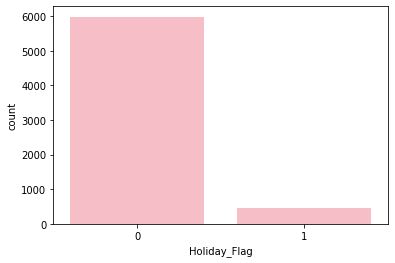

In [11]:
sns.countplot(df.Holiday_Flag,color='lightpink') # Freq of occurance of various classes in Holiday_Flag variable

In [12]:
df_num=df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']]

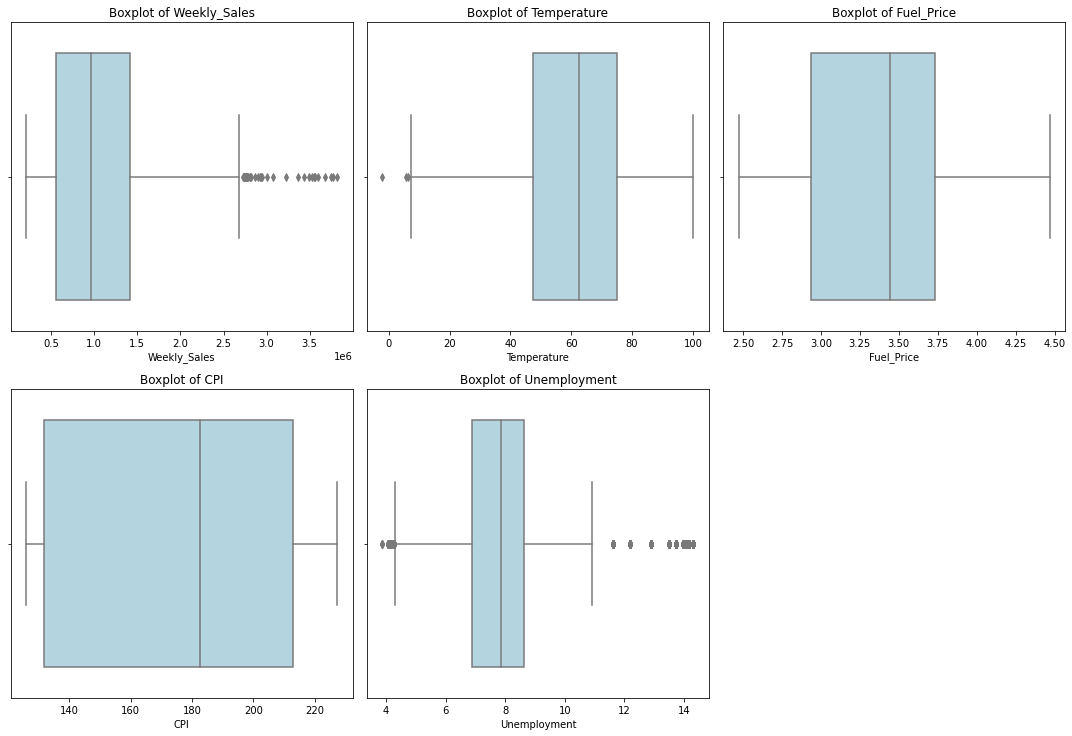

In [13]:
#Checking for Outliers Using Boxplots

plt.figure(figsize=(15,15))
list_of_column=df_num.columns

for i in range(len(list_of_column)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = df_num[list_of_column[i]],data=df_num,color='lightblue')
    plt.title('Boxplot of {}'.format(list_of_column[i]))
    plt.tight_layout()

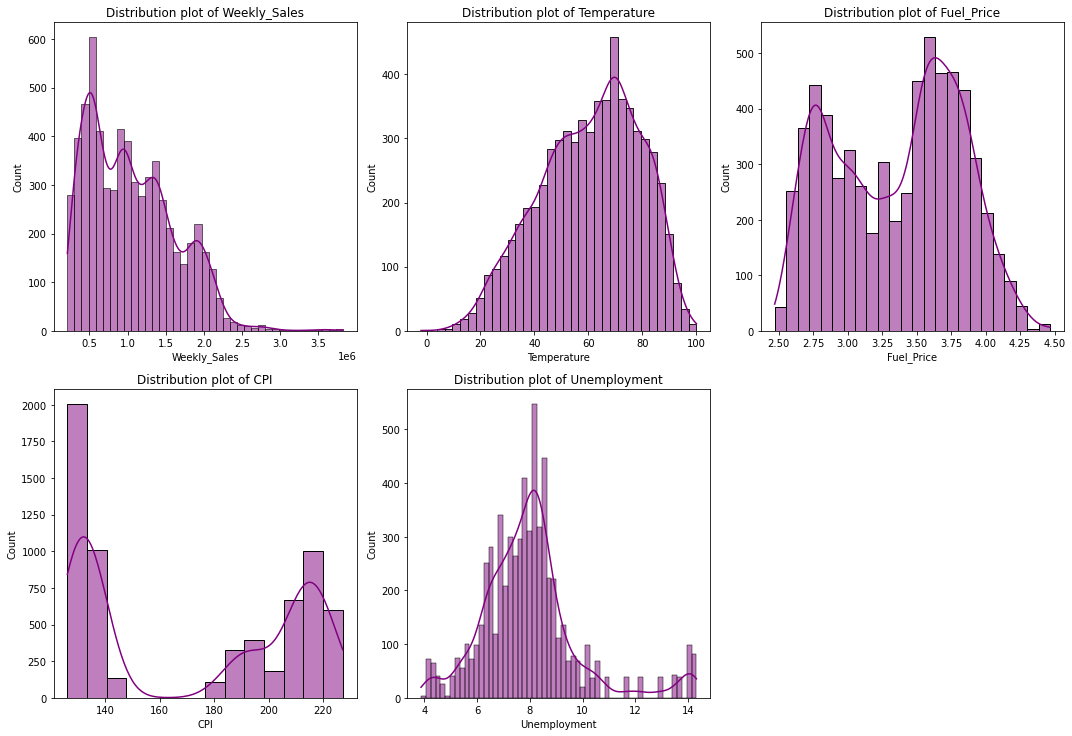

In [14]:
# Checking Distributions for Numerical Columns

plt.figure(figsize=(15,15))
list_of_column=df_num.columns

for i in range(len(list_of_column)):
    plt.subplot(3,3,i+1)
    sns.histplot(x = df_num[list_of_column[i]],data=df_num,kde=True,color='purple')
    plt.title('Distribution plot of {}'.format(list_of_column[i]))
    plt.tight_layout()

## Bi variate analysis

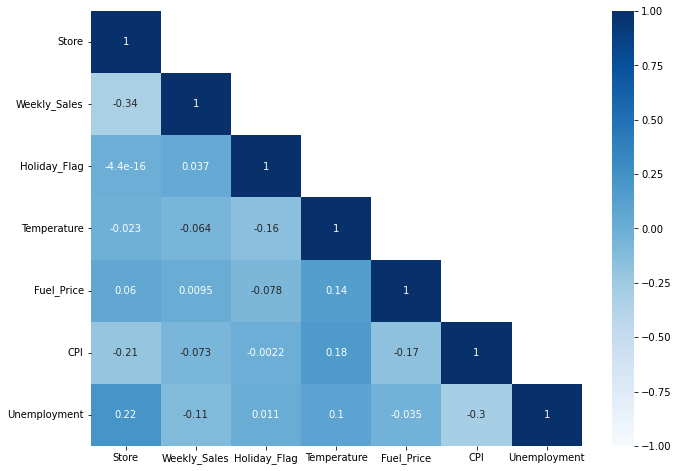

In [15]:
# Creating Heat map

df_corr=df.corr()
plt.figure(figsize=(11,8))
mask = np.array(df_corr)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =df_corr, annot =True, mask =mask,vmax =1, vmin=-1, cmap ='Blues');

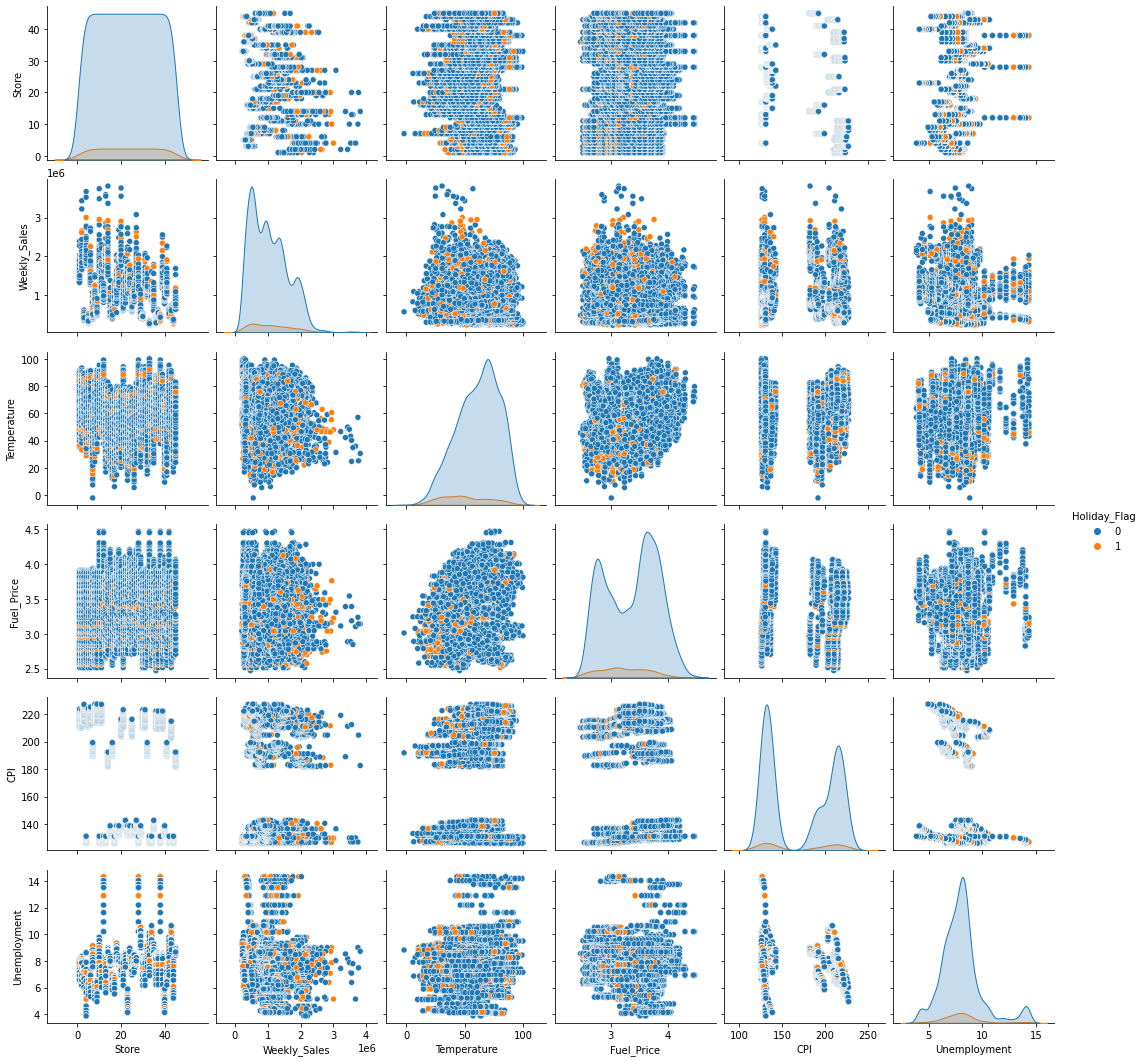

In [16]:
# Creating pairplot

sns.pairplot(df,hue='Holiday_Flag')

In [17]:
## Defining User Defined Funtcion

def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [18]:
# Capping & Flooring for outlier Treatment

lrtravel,urtravel=remove_outlier(df['Unemployment'])
df['Unemployment']=np.where(df['Unemployment']>urtravel,urtravel,df['Unemployment'])
df['Unemployment']=np.where(df['Unemployment']<lrtravel,lrtravel,df['Unemployment'])

lrmiles,urmiles=remove_outlier(df['Weekly_Sales'])
df['Weekly_Sales']=np.where(df['Weekly_Sales']>urmiles,urmiles,df['Weekly_Sales'])
df['Weekly_Sales']=np.where(df['Weekly_Sales']<lrmiles,lrmiles,df['Weekly_Sales'])

lrmiles,urmiles=remove_outlier(df['Temperature'])
df['Temperature']=np.where(df['Temperature']>urmiles,urmiles,df['Temperature'])
df['Temperature']=np.where(df['Temperature']<lrmiles,lrmiles,df['Temperature'])


In [19]:
# Disintegrating the Date into its components

df.Date=pd.to_datetime(df.Date)
df['Weekday']=df.Date.dt.weekday
df['Month']=df.Date.dt.month
df['year']=df.Date.dt.year

In [20]:
df.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekday,Month,year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,6,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,3,12,2010


In [21]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Weekday', 'Month', 'year'],
      dtype='object')

In [22]:
# Separating X nd y variables
X=df.drop(['Weekly_Sales','Date'],axis=1)

y=df['Weekly_Sales']

In [23]:
# Encoding the Categorical Columns
dummies=pd.get_dummies(df[["Holiday_Flag", "Store","Weekday","Month","year"]], columns=["Holiday_Flag", "Store","Weekday","Month","year"], prefix=["Holiday_Flag", "Store","Weekday","Month","year"],drop_first=True)

In [24]:
columns=["Store", "Holiday_Flag","Weekday","Month","year"]
X = pd.concat([X, dummies], axis=1)

# drop original columns from "df"
X.drop(columns, axis = 1, inplace=True)



In [25]:
X.head(10)

,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_1,Store_2,Store_3,Store_4,Store_5,Store_6,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,year_2011,year_2012
0,42.31,2.572,211.096358,8.106,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,38.51,2.548,211.242170,8.106,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,39.93,2.514,211.289143,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46.63,2.561,211.319643,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,46.50,2.625,211.350143,8.106,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,57.79,2.667,211.380643,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,54.58,2.720,211.215635,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,51.45,2.732,211.018042,8.106,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,62.27,2.719,210.820450,7.808,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,65.86,2.770,210.622857,7.808,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
X.Holiday_Flag_1.value_counts()

0    5985
1     450
Name: Holiday_Flag_1, dtype: int64

In [27]:
X.shape

(6435, 68)

In [28]:
y.shape

(6435,)

In [29]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,6435.0,60.665183,18.440508,6.2400,47.460,62.670000,74.940000,100.140000
Fuel_Price,6435.0,3.358607,0.459020,2.4720,2.933,3.445000,3.735000,4.468000
CPI,6435.0,171.578394,39.356712,126.0640,131.735,182.616521,212.743293,227.232807
Unemployment,6435.0,7.871208,1.520694,4.2945,6.891,7.874000,8.622000,11.218500
Holiday_Flag_1,6435.0,0.069930,0.255049,0.0000,0.000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
Month_10,6435.0,0.090909,0.287502,0.0000,0.000,0.000000,0.000000,1.000000
Month_11,6435.0,0.062937,0.242869,0.0000,0.000,0.000000,0.000000,1.000000
Month_12,6435.0,0.076923,0.266490,0.0000,0.000,0.000000,0.000000,1.000000
year_2011,6435.0,0.363636,0.481083,0.0000,0.000,0.000000,1.000000,1.000000


In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 68 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     6435 non-null   float64
 1   Fuel_Price      6435 non-null   float64
 2   CPI             6435 non-null   float64
 3   Unemployment    6435 non-null   float64
 4   Holiday_Flag_1  6435 non-null   uint8  
 5   Store_2         6435 non-null   uint8  
 6   Store_3         6435 non-null   uint8  
 7   Store_4         6435 non-null   uint8  
 8   Store_5         6435 non-null   uint8  
 9   Store_6         6435 non-null   uint8  
 10  Store_7         6435 non-null   uint8  
 11  Store_8         6435 non-null   uint8  
 12  Store_9         6435 non-null   uint8  
 13  Store_10        6435 non-null   uint8  
 14  Store_11        6435 non-null   uint8  
 15  Store_12        6435 non-null   uint8  
 16  Store_13        6435 non-null   uint8  
 17  Store_14        6435 non-null   u

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=123)

In [33]:
X_train.head()

,Temperature,Fuel_Price,CPI,Unemployment,Holiday_Flag_1,Store_2,Store_3,Store_4,Store_5,Store_6,...,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,year_2011,year_2012
1155,61.26,2.795,213.949614,6.3840,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3532,30.23,3.422,212.571112,6.9610,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3972,56.26,4.038,130.896645,11.2185,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
283,60.97,3.601,223.015426,6.1700,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
6233,67.54,3.641,129.430600,6.5600,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [34]:
X_train.shape

(4504, 68)

In [35]:
# Creating 3 models Linear Regression, Decision Tree Regressor, Random Forest Regressor

rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    i.fit(X_train,y_train)
    scores_train.append(i.score(X_train, y_train))
    scores_test.append(i.score(X_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))

In [36]:
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor']))

                            Train RMSE      Test RMSE  Training Score  \
Linear Regression        133661.565793  136916.508104        0.942203   
Decision Tree Regressor       0.000000  166803.274689        1.000000   
Random Forest Regressor   48473.608991  127709.889538        0.992398   

                         Test Score  
Linear Regression          0.940262  
Decision Tree Regressor    0.911336  
Random Forest Regressor    0.948026  


#### Both the Decision Tree Regressor and Random forest Regressor seem to be overfit. Applying Grid Search CV to do hyper parameters tuning!

### USING GRIDSEARCH CV FOR DECISION TREE REGRESSOR

In [37]:
param_grid = {
    'max_depth': [30,40,50],# 3,5,7,9
    'min_samples_leaf': [25,30,35,40], # 1-3% TRAIN DATA
    'min_samples_split': [50,60,70,80],#3X min sample leaf
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 5)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'max_depth': 40, 'min_samples_leaf': 25, 'min_samples_split': 50}


# USING GRIDSEARCHCV FOR RANDOM FORST REGRESSOR

In [38]:
param_grid = {
    'max_depth': [40],
    'max_features': [4,6],
    'min_samples_leaf': [15,20],
    'min_samples_split': [30,40],
    'n_estimators': [500] 
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [39]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [40], 'max_features': [4, 6],
                         'min_samples_leaf': [15, 20],
                         'min_samples_split': [30, 40], 'n_estimators': [500]})

In [40]:
print(grid_search.best_params_)

{'max_depth': 40, 'max_features': 6, 'min_samples_leaf': 15, 'min_samples_split': 30, 'n_estimators': 500}


In [41]:
# REGULARISED MODELS

rfr = RandomForestRegressor(max_depth=40, max_features=6, 
                            min_samples_leaf= 15,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=40,min_samples_split=40,min_samples_leaf=20,random_state=123)

In [42]:
models=[regression_model,dtr,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

In [43]:
for i in models:
    i.fit(X_train,y_train)
    scores_train.append(i.score(X_train, y_train))
    scores_test.append(i.score(X_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))

In [44]:
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression Model','Decision Tree Regressor','Random Forest Regressor']))

                            Train RMSE      Test RMSE  Training Score  \
Linear Regression Model  133661.565793  136916.508104        0.942203   
Decision Tree Regressor  128650.535541  148022.052194        0.946456   
Random Forest Regressor  187446.423524  194864.292184        0.886330   

                         Test Score  
Linear Regression Model    0.940262  
Decision Tree Regressor    0.930179  
Random Forest Regressor    0.878996  


In [45]:
dtr.feature_importances_

array([0.00366901, 0.00281546, 0.03282099, 0.02575849, 0.00041844,
       0.07176953, 0.00672388, 0.08624158, 0.01395851, 0.03583034,
       0.        , 0.        , 0.01037709, 0.06985759, 0.0224229 ,
       0.        , 0.0820989 , 0.08434174, 0.00737462, 0.0006992 ,
       0.00067782, 0.00045877, 0.02558371, 0.08483617, 0.0057714 ,
       0.00056266, 0.02326617, 0.02244792, 0.        , 0.        ,
       0.05122956, 0.02323948, 0.01025374, 0.01043421, 0.02314427,
       0.01222677, 0.02912958, 0.        , 0.        , 0.00636387,
       0.01004649, 0.01652119, 0.02539457, 0.        , 0.01859961,
       0.00877735, 0.        , 0.02838736, 0.        , 0.        ,
       0.        , 0.        , 0.00227605, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00012306, 0.        , 0.        ,
       0.00145721, 0.00084225, 0.00077049])

In [46]:
feature_df=pd.DataFrame(dtr.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False)

In [47]:
feature_df.head(25)

,Imp
Store_4,0.086242
Store_20,0.084836
Store_14,0.084342
Store_13,0.082099
Store_2,0.071770
Store_10,0.069858
Store_27,0.051230
Store_6,0.035830
CPI,0.032821
Store_33,0.029130


In [48]:
feature_df.tail(25)

,Imp
Month_9,0.000123
Month_8,0.000000
Month_7,0.000000
Month_6,0.000000
Weekday_6,0.000000
Month_5,0.000000
Month_4,0.000000
Month_10,0.000000
Month_3,0.000000
Month_11,0.000000
